In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDataDF = pd.read_csv(mouse_drug_data_to_load)
clinicalDataDF = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticalDataDF = pd.merge(mouseDataDF, clinicalDataDF, how='outer', on='Mouse ID').sort_values(by='Mouse ID')

# Display the data table for preview
#pymaceuticalDataDF.to_csv('data/Pymaceutical_Data.csv')
pymaceuticalDataDF.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
926,a203,Infubinol,0,45.000000,0
934,a203,Infubinol,40,63.593490,2
933,a203,Infubinol,35,61.931650,2
932,a203,Infubinol,30,59.523197,1
931,a203,Infubinol,25,56.793208,1
930,a203,Infubinol,20,55.173336,1
929,a203,Infubinol,15,52.777870,1
928,a203,Infubinol,10,51.852437,1
935,a203,Infubinol,45,67.973419,2
927,a203,Infubinol,5,48.508468,0


In [2]:
#Different types of Drug used.
drugList = sorted(pymaceuticalDataDF['Drug'].unique())
print(f"List of Drugs used: \n{drugList}")

#Different types of Mice used.
miceList = sorted(pymaceuticalDataDF['Mouse ID'].unique())
print(f"\nList of Mice used: \n{miceList}")

List of Drugs used: 
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

List of Mice used: 
['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k

## Tumor Response to Treatment

In [3]:
# Calculate the effect of the Tumor against a Drug and a Timepoint. 
# In other words, how much the Tumor has increased / decreased when the same Drug is applied at different Timepoints.

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorByDrugTP = pymaceuticalDataDF.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumorByDrugTPDF = pd.DataFrame(tumorByDrugTP)
tumorByDrugTP_indexed_df = tumorByDrugTPDF.reset_index()
# Preview DataFrame
tumorByDrugTP_indexed_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [59]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorByDrugTPSE = pymaceuticalDataDF.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tumorByDrugTPSEDF = pd.DataFrame(tumorByDrugTPSE)
tumorByDrugTPSEDF_indexed_df = tumorByDrugTPSEDF.reset_index()

# Preview DataFrame
tumorByDrugTPSEDF_indexed_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [22]:
# Minor Data Munging to Re-Format the Data Frames
# Unstack the Tumor Response DataFrame at level 0 to set the Index at Timepoint and create 
# the different drugs as the headers.
# The new DataFrame now displays the Tumor Volume against different drugs at the indexed / grouped by Timepoint 

tumorByDrugTP_unstacked_df = tumorByDrugTPDF.unstack(0)
tumorByDrugTP_unstacked_df = tumorByDrugTP_unstacked_df['Tumor Volume (mm3)']

# Preview that Reformatting worked
tumorByDrugTP_unstacked_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [61]:
# Unstack the Standard Error DataFrame at level 0 to set the Index at Timepoint and create 
# the different drugs as the headers.
# The new DataFrame now displays the Tumor Volume Standard Error against different drugs 
# at the indexed / grouped by Timepoint 

tumorByDrugTPSEDF_unstacked_df = tumorByDrugTPSEDF.unstack(0)
tumorByDrugTPSEDF_unstacked_df = tumorByDrugTPSEDF_unstacked_df['Tumor Volume (mm3)']

# Preview that Reformatting worked
tumorByDrugTPSEDF_unstacked_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


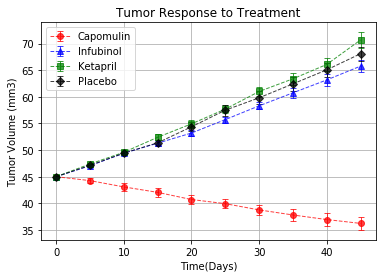

In [92]:
# Generate the Plot (with Error Bars)
def plotErrorBars(drug, colorType, label, marker):
    '''
        Generate the Plot with Error Bars.
        X-Axis: Time in days.
        Y-Axis: Total Volume of Drugs (mm3).
        Y-Error: Standard Error Measurement Series for a Drug from Timepoint 0 to 45.        
    '''
    x_axis = np.arange(0, max(pymaceuticalDataDF['Timepoint'].unique())+5, 5)
    y_axis = tumorByDrugTP_unstacked_df[drug]
    yError = tumorByDrugTPSEDF_unstacked_df[drug]

    plt.errorbar(x_axis, y_axis, yerr=yError, fmt=marker, ls="dashed", label=label, linewidth=1, alpha=0.75, 
                 capsize=3,color =colorType)

plotErrorBars('Capomulin', 'red', 'Capomulin', 'o')
plotErrorBars('Infubinol', 'blue', 'Infubinol', '^')
plotErrorBars('Ketapril',  'green', 'Ketapril', 's')
plotErrorBars('Placebo',   'black', 'Placebo', 'D')

plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

plt.legend(loc = 'best')
plt.grid()

# Save the Figure
plt.savefig('Tumore_Response.png')
plt.show()


## Metastatic Response to Treatment

In [96]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
msSitesByDrugTP = pymaceuticalDataDF.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
msSitesByDrugTPDF = pd.DataFrame(msSitesByDrugTP)
msSitesByDrugTPDF_indexed_df = msSitesByDrugTPDF.reset_index()

# Preview DataFrame
msSitesByDrugTPDF_indexed_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [97]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
msSitesByDrugTPSE = pymaceuticalDataDF.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
msSitesByDrugTPSEDF = pd.DataFrame(msSitesByDrugTPSE)
msSitesByDrugTPSEDF_indexed_df = msSitesByDrugTPSEDF.reset_index()

# Preview DataFrame
msSitesByDrugTPSEDF_indexed_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [98]:
# Minor Data Munging to Re-Format the Data Frames
msSitesByDrugTP_unstacked_df = msSitesByDrugTPDF.unstack(0)
msSitesByDrugTP_unstacked_df = msSitesByDrugTP_unstacked_df['Metastatic Sites']

# Preview that Reformatting worked
msSitesByDrugTP_unstacked_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [99]:
# Unstack the Standard Error DataFrame at level 0 to set the Index at Timepoint and create 
# the different drugs as the headers.
# The new DataFrame now displays the Metastatic Sites Standard Error against different drugs 
# at the indexed / grouped by Timepoint 

msSitesByDrugTPSEDF_unstacked_df = msSitesByDrugTPSEDF.unstack(0)
msSitesByDrugTPSEDF_unstacked_df = msSitesByDrugTPSEDF_unstacked_df['Metastatic Sites']

# Preview that Reformatting worked
msSitesByDrugTPSEDF_unstacked_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


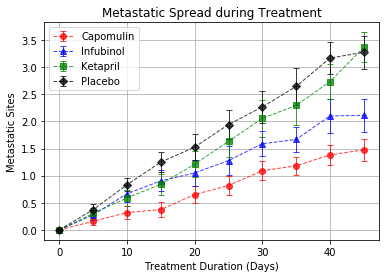

In [100]:
# Generate the Plot (with Error Bars)
def plotErrorBars(drug, colorType, label, marker):
    '''
        Generate the Plot with Error Bars.
        X-Axis: Time in days.
        Y-Axis: Metastatic Sites.
        Y-Error: Standard Error Measurement Series for a Drug against a Site from Timepoint 0 to 45.        
    '''
    x_axis = np.arange(0, max(pymaceuticalDataDF['Timepoint'].unique())+5, 5)
    y_axis = msSitesByDrugTP_unstacked_df[drug]
    yError = msSitesByDrugTPSEDF_unstacked_df[drug]

    plt.errorbar(x_axis, y_axis, yerr=yError, fmt=marker, ls="dashed", label=label, linewidth=1, alpha=0.75, 
                 capsize=3,color =colorType)

plotErrorBars('Capomulin', 'red', 'Capomulin', 'o')
plotErrorBars('Infubinol', 'blue', 'Infubinol', '^')
plotErrorBars('Ketapril',  'green', 'Ketapril', 's')
plotErrorBars('Placebo',   'black', 'Placebo', 'D')

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread during Treatment")

plt.legend(loc = 'best')
plt.grid()

# Save the Figure
plt.savefig('Metastatic_Spread_Response.png')
plt.show()

## Survival Rates

In [108]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
miceByDrugTP = pymaceuticalDataDF.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
miceByDrugTPDF = pd.DataFrame(miceByDrugTP)
miceByDrugTPDF = miceByDrugTPDF.rename(columns={"Mouse ID":"Mouse Count"})
miceByDrugTPDF_indexed_df = miceByDrugTPDF.reset_index()
# Preview DataFrame
miceByDrugTPDF_indexed_df.head(10)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [109]:
# Minor Data Munging to Re-Format the Data Frames
miceByDrugTPDF_unstacked_df = miceByDrugTPDF.unstack(0)
miceByDrugTPDF_unstacked_df = miceByDrugTPDF_unstacked_df['Mouse Count']

# Preview that Reformatting worked
miceByDrugTPDF_unstacked_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


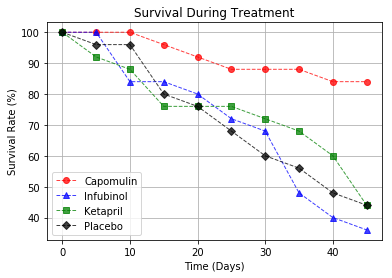

In [117]:
# Generate the Plot (with Error Bars)
def plotErrorBars(drug, drugSeries, colorType, label, marker):
    '''
        Generate the Plot with Error Bars.
        X-Axis: Time in days.
        Y-Axis: Metastatic Sites.
        Y-Error: Standard Error Measurement Series for a Drug against a Site from Timepoint 0 to 45.        
    '''
    x_axis = np.arange(0, max(pymaceuticalDataDF['Timepoint'].unique())+5, 5)
    y_axis = ((drugSeries/25) * 100)

    plt.errorbar(x_axis, y_axis, fmt=marker, ls="dashed", label=label, linewidth=1, alpha=0.75, 
                 capsize=3,color =colorType)

plotErrorBars('Capomulin', miceByDrugTPDF_unstacked_df['Capomulin'], 'red', 'Capomulin', 'o')
plotErrorBars('Infubinol', miceByDrugTPDF_unstacked_df['Infubinol'], 'blue', 'Infubinol', '^')
plotErrorBars('Ketapril',  miceByDrugTPDF_unstacked_df['Ketapril'], 'green', 'Ketapril', 's')
plotErrorBars('Placebo',   miceByDrugTPDF_unstacked_df['Placebo'], 'black', 'Placebo', 'D')

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

plt.legend(loc = 'best')
plt.grid()

# Save the Figure
plt.savefig('Survival_Rate.png')
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [16]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined